# 911 Calls Capstone Project

**The 911 calls data is an artificial data set from kaggle**

## Data and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Finding basic information:

**What are the top 5 zipcodes for 911 calls?**

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships for 911 calls?**

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**How many unique title codes are there?**

In [7]:
df['title'].nunique()

110

## Creating new features

**Using a string manipulating function create a new column in the dataframe that lists the reason for the 911 call**

In [8]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**The most common reason for 911 calls:**

In [9]:
df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

**Plotting 911 calls by Reason:**

<Axes: xlabel='Reason', ylabel='count'>

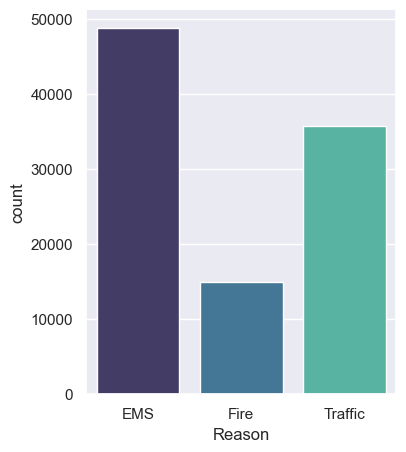

In [10]:
plt.figure(figsize = (4,5))
sns.countplot(data = df, x = 'Reason', hue = None, palette = 'mako')

## Changing the timestamp into a Datetime data type:

In [11]:
print(df['timeStamp'][0])
type(df['timeStamp'][0])

2015-12-10 17:40:00


str

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], yearfirst= True)

#checking new data type:

df['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99492 entries, 0 to 99491
Series name: timeStamp
Non-Null Count  Dtype         
--------------  -----         
99492 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 777.4 KB


**Creating an hour, month, and day column based on the Datetime timeStamp column:**

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)

df['Month'] = df['timeStamp'].apply(lambda x : x.month)

df['Day of Week'] = df['timeStamp'].apply(lambda x : x.day_name())

#checking new head 
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday


**Plotting day of Week column with the hue based off of the Reason column:**

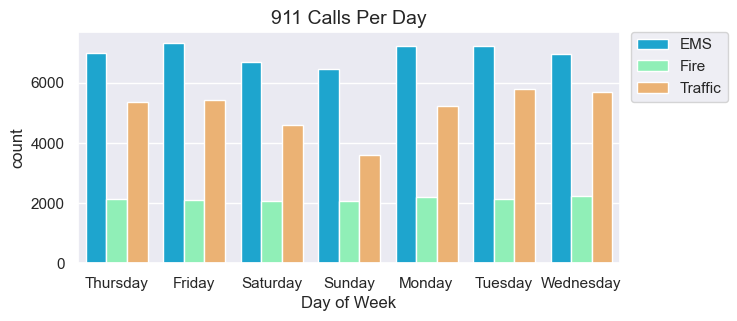

In [14]:
plt.figure(figsize=(7,3))

sns.countplot(data = df, x = 'Day of Week', hue = 'Reason', palette = 'rainbow')

plt.title('911 Calls Per Day', fontsize = 14)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**Now for the Month:**

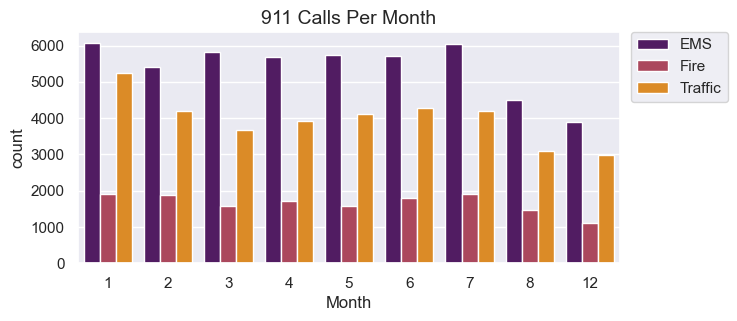

In [15]:
plt.figure(figsize=(7,3))

sns.countplot(data = df, x = 'Month', hue = 'Reason', palette = 'inferno')

plt.title('911 Calls Per Month', fontsize = 14)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**Getting the aggregate information from the dataframe:**

In [16]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Plotting the amount of calls per month:**

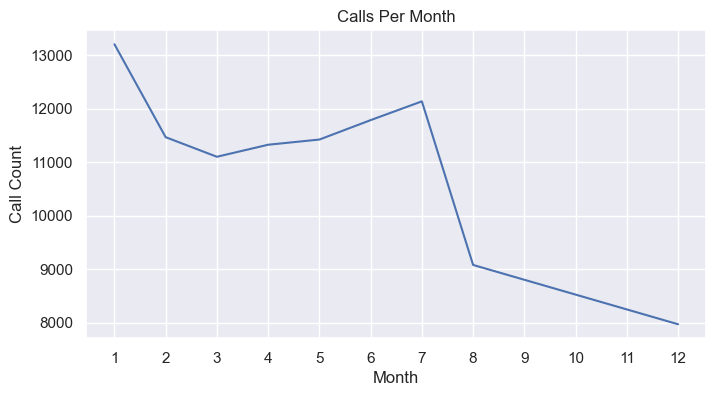

In [17]:
plt.figure(figsize=(8,4))

byMonth['Reason'].plot()

plt.title('Calls Per Month')
plt.xlabel('Month')
plt.ylabel('Call Count')
plt.xticks(ticks = np.arange(1,13))
plt.yticks()
plt.show()

**Creating a linear model of the calls per month plot expecting the error to be highes from August-December due to the 
missing data:**

In [18]:
byMonth = byMonth.reset_index()
byMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Figure size 800x400 with 0 Axes>

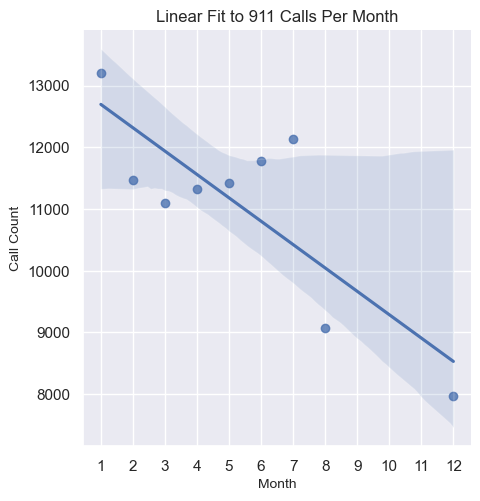

In [19]:
plt.figure(figsize = (8,4))

sns.lmplot(data = byMonth, x = 'Month', y = 'Reason')

plt.title('Linear Fit to 911 Calls Per Month', fontsize = 12)

plt.ylabel('Call Count', fontsize = 10)
plt.xlabel('Month', fontsize = 10)
plt.xticks(ticks = np.arange(1,13))
plt.yticks()
plt.show()

**Creating a new column for the date:** 

In [20]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10


**Plotting the quantity of 911 calls per date:**

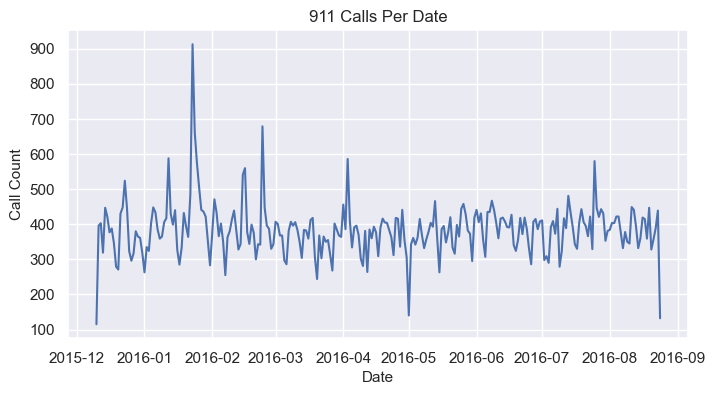

In [21]:
byDate = df.groupby('Date').count()

plt.figure(figsize = (8,4))
byDate['Reason'].plot()

plt.title('911 Calls Per Date')
plt.xlabel('Date', fontsize = 11)
plt.ylabel('Call Count', fontsize = 11)
plt.show()

**Traffic 911 Calls Per Date:**

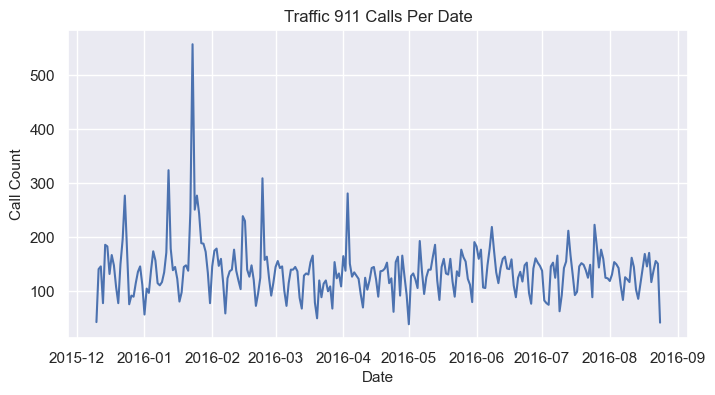

In [22]:
plt.figure(figsize = (8,4))

df[df['Reason'] == 'Traffic'].groupby('Date').count()['Reason'].plot()

plt.title('Traffic 911 Calls Per Date')
plt.xlabel('Date', fontsize = 11)
plt.ylabel('Call Count', fontsize = 11)
plt.show()

**Fire 911 Calls Per Date:**

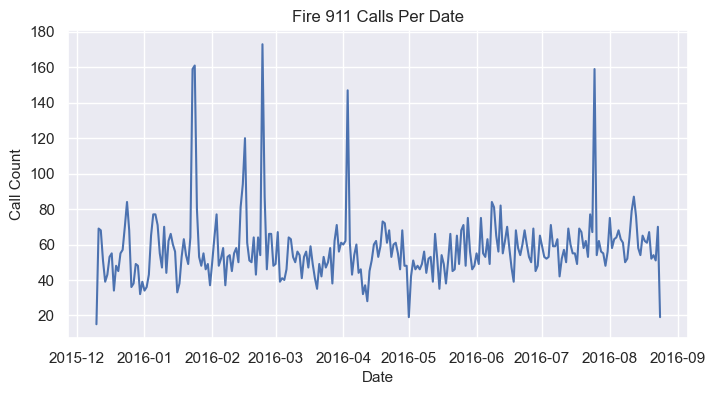

In [23]:
plt.figure(figsize = (8,4))

df[df['Reason'] == 'Fire'].groupby('Date').count()['Reason'].plot()

plt.title('Fire 911 Calls Per Date')
plt.xlabel('Date', fontsize = 11)
plt.ylabel('Call Count', fontsize = 11)
plt.show()

**EMS 911 Calls Per Date:**

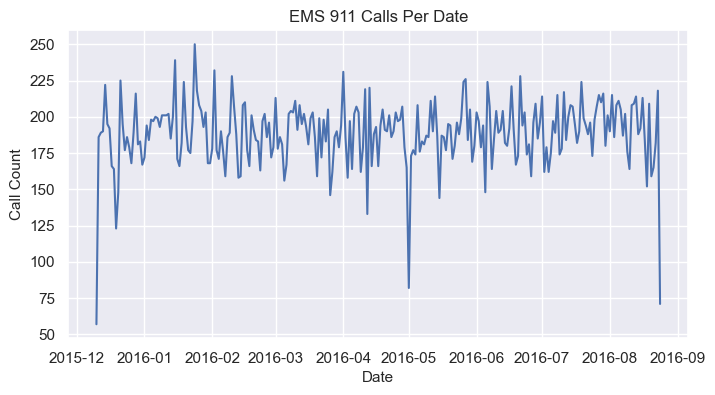

In [24]:
plt.figure(figsize = (8,4))

df[df['Reason'] == 'EMS'].groupby('Date').count()['Reason'].plot()

plt.title('EMS 911 Calls Per Date')
plt.xlabel('Date', fontsize = 11)
plt.ylabel('Call Count', fontsize = 11)
plt.show()

## Creating a heat map that demonstrates what times and days get the most 911 calls:

In [25]:
dfheat1 = df.groupby(['Day of Week', 'Hour']).count()['Reason'].unstack()
dfheat1.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


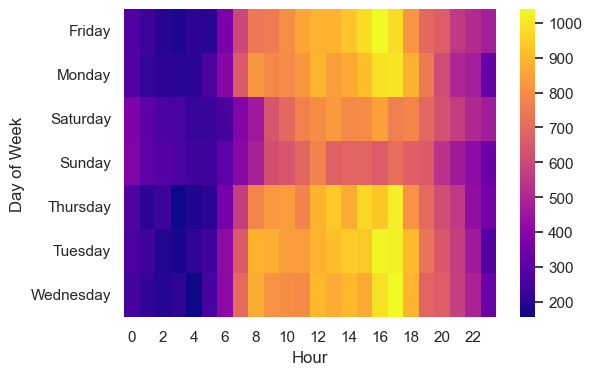

In [26]:
plt.figure(figsize = (6,4))

sns.heatmap(data = dfheat1, cmap = 'plasma')

plt.show()

## Cluster map of the amount of calls per day and hour: 

<Figure size 500x500 with 0 Axes>

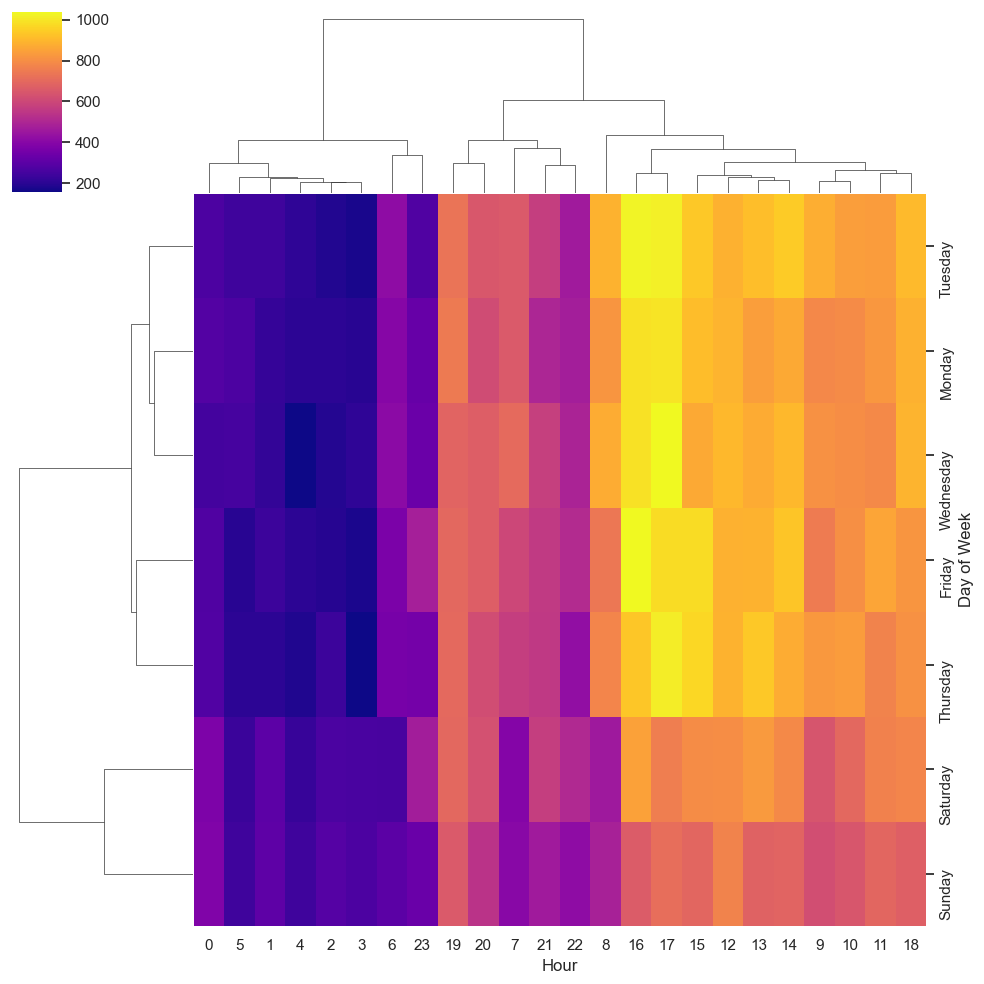

In [27]:
plt.figure(figsize = (5,5))

sns.clustermap(data = dfheat1, cmap = 'plasma')

plt.show()

## Creating a heat map that demonstrates what months and days get the most 911 calls:

In [28]:
dfheat2 = df.groupby(['Day of Week', 'Month']).count()['Reason'].unstack()
dfheat2.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266


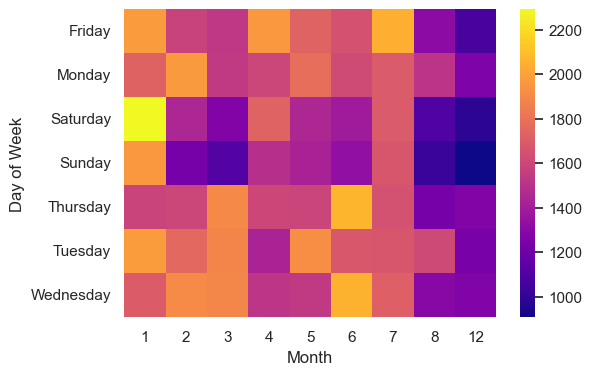

In [29]:
plt.figure(figsize = (6,4))

sns.heatmap(data = dfheat2, cmap = 'plasma')

plt.show()

## Cluster map of the amount of calls per day and month: 

<Figure size 500x500 with 0 Axes>

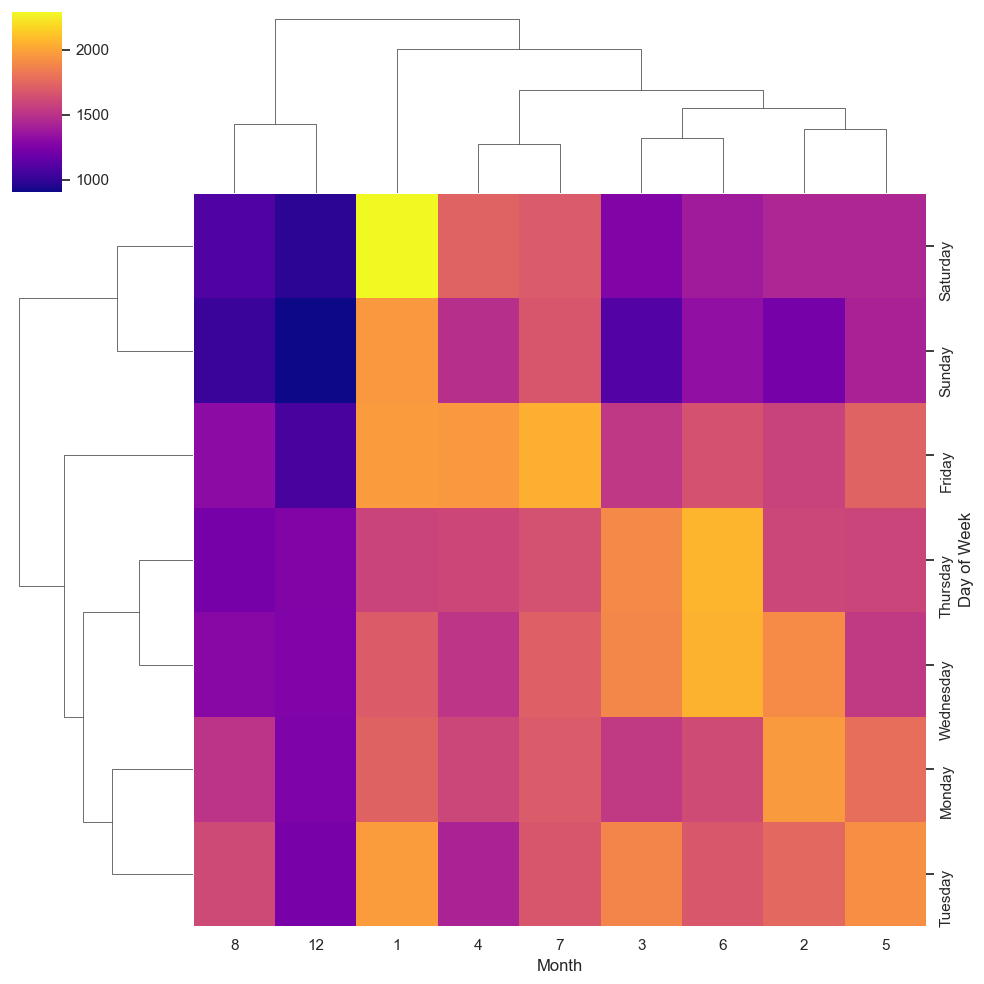

In [30]:
plt.figure(figsize = (5,5))

sns.clustermap(data = dfheat2, cmap = 'plasma')

plt.show()